<a href="https://colab.research.google.com/github/tomiambro/ap_automatico/blob/tps-tomi/tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling
import numpy as np
from PIL import Image

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
root_path = 'gdrive/MyDrive/machine_learning/ap_automatico/stanford-dogs-dataset'  #change dir to your project folder

In [4]:
ls {root_path}

annotations/  images/


In [5]:
from pathlib import Path
imgs_path = Path(f'{root_path}/images/Images')
imgs_path.relative_to(root_path)

PosixPath('images/Images')

In [6]:
classes_path = [c for c in imgs_path.iterdir() if c.is_dir()]
classes_names = [str(c.stem).lower().split('-')[1] for c in classes_path]
classes_names[:5]

['chihuahua', 'maltese_dog', 'japanese_spaniel', 'pekinese', 'shih']

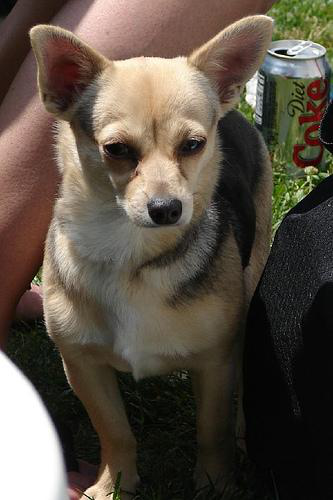

In [7]:
chihuahuas = [img for img in classes_path[0].iterdir()]
Image.open(chihuahuas[0])

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  imgs_path,
  labels="inferred",
  label_mode='categorical',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size=8)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  imgs_path,
  labels="inferred",
  label_mode='categorical',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=8)

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [10]:
class_names = train_ds.class_names
n_output = len(class_names)
n_output

120

In [12]:
model = tf.keras.Sequential([
      Rescaling(1./255),
      Conv2D(16, 3, activation='relu'),
      MaxPooling2D(),
      Conv2D(4, 3, activation='relu'),
      MaxPooling2D(),
      Flatten(),
      Dense(25, activation='relu'),
      Dense(n_output, activation='softmax')
])

In [13]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

In [14]:
model.build((None, 180, 180, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 4)         580       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 4)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7396)              0

In [15]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
2058/2058 [==============================] - 3011s 1s/step - loss: 4.7698 - accuracy: 0.0149 - val_loss: 4.6651 - val_accuracy: 0.0233
Epoch 2/3
2058/2058 [==============================] - 379s 184ms/step - loss: 4.5793 - accuracy: 0.0262 - val_loss: 4.5849 - val_accuracy: 0.0258
Epoch 3/3
2058/2058 [==============================] - 371s 180ms/step - loss: 4.4531 - accuracy: 0.0400 - val_loss: 4.6153 - val_accuracy: 0.0282
